# <span style="color:darkBlue">Presented By: Sandhya Kumari</span>

<!-- <h1 id="tocheading">Table of Contents</h1> -->
<!-- <div id="toc"></div> -->

<h2 id="tocheading"><font color='darkblue'>Table of Contents</font></h2>
<div id="toc"></div>


### Cruise to Superstore data to discover trends and insights:



In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [92]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [93]:

# read GlobalSuperstoreOrders2016.excel file 
xls = pd.ExcelFile('SuperstoreOrders.xlsx')

orders = pd.read_excel(xls, 'Orders')


In [94]:
# used following code in terminal to convert jupyter notebook file to html to embed as html page
#jupyter nbconvert  --to html  GlobalSuperStore.ipynb

#### Order Data Info:

In [95]:
# checking the shape of the dataframe(rows,columns)
orders.shape #(51290, 24)

(9994, 21)

In [96]:
# checking full information 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID            9994 non-null int64
Order ID          9994 non-null object
Order Date        9994 non-null datetime64[ns]
Ship Date         9994 non-null datetime64[ns]
Ship Mode         9994 non-null object
Customer ID       9994 non-null object
Customer Name     9994 non-null object
Segment           9994 non-null object
Country/Region    9994 non-null object
City              9994 non-null object
State             9994 non-null object
Postal Code       9983 non-null float64
Region            9994 non-null object
Product ID        9994 non-null object
Category          9994 non-null object
Sub-Category      9994 non-null object
Product Name      9994 non-null object
Sales             9994 non-null float64
Quantity          9994 non-null int64
Discount          9994 non-null float64
Profit            9994 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(

In [97]:
# let's see column names and their data types
#orders.dtypes
# all info about the data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID            9994 non-null int64
Order ID          9994 non-null object
Order Date        9994 non-null datetime64[ns]
Ship Date         9994 non-null datetime64[ns]
Ship Mode         9994 non-null object
Customer ID       9994 non-null object
Customer Name     9994 non-null object
Segment           9994 non-null object
Country/Region    9994 non-null object
City              9994 non-null object
State             9994 non-null object
Postal Code       9983 non-null float64
Region            9994 non-null object
Product ID        9994 non-null object
Category          9994 non-null object
Sub-Category      9994 non-null object
Product Name      9994 non-null object
Sales             9994 non-null float64
Quantity          9994 non-null int64
Discount          9994 non-null float64
Profit            9994 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(

In [98]:
# Number of orders:
NumberOfOrders = orders["Order ID"].count()
NumberOfOrders

9994

In [99]:
orders[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [100]:
# Let's check columns with missing values
nulls = orders.isnull().sum()
#nulls[nulls > 0]
nulls

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [101]:
# check for any duplicate
duplicates = orders[orders.duplicated()]
duplicates # no duplicate row

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [102]:
# descriptive statistics for 'numeric' columns
orders.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [103]:
# Display all categorical columns
categ = orders['Sub-Category'].value_counts()
categ

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [104]:
# let's drop non-informative columns including postal code they aren't providing any insight
df = orders.drop(['Postal Code', 'Order ID',"Customer ID","Row ID", "Product ID"], axis=1)

### Step 2: Exploratory Data Analysis
#### (i) Distribution of Numeric Variables

In [105]:
# creating a data frame using all categorical variables
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
Ship Mode         9994 non-null object
Customer Name     9994 non-null object
Segment           9994 non-null object
Country/Region    9994 non-null object
City              9994 non-null object
State             9994 non-null object
Region            9994 non-null object
Category          9994 non-null object
Sub-Category      9994 non-null object
Product Name      9994 non-null object
dtypes: object(10)
memory usage: 780.9+ KB


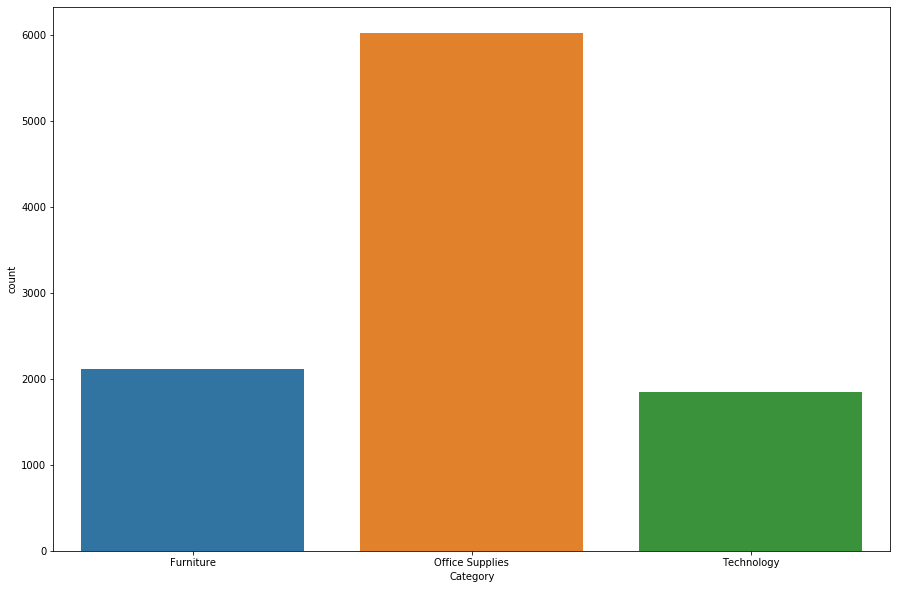

In [106]:
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(x='Category', data=df)
# g.fig.set_size_inches(15,15)

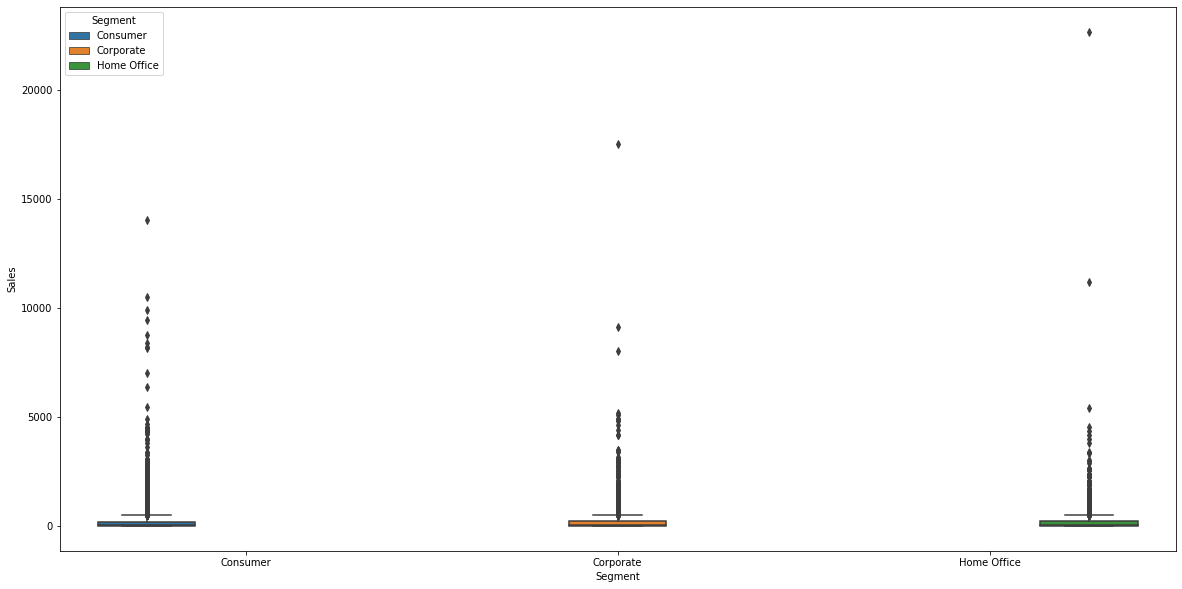

In [107]:
# plotting using seaborn library
# sns.countplot(x='Ship Mode', data=df)
# sns.countplot(x='Segment', data=df)
# sns.countplot(x='Category', data=df)
# sns.countplot(x='Sub-Category', data=df)
#let's check Sales by segment 
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(y='Sales', x='Segment', data=df, hue="Segment")

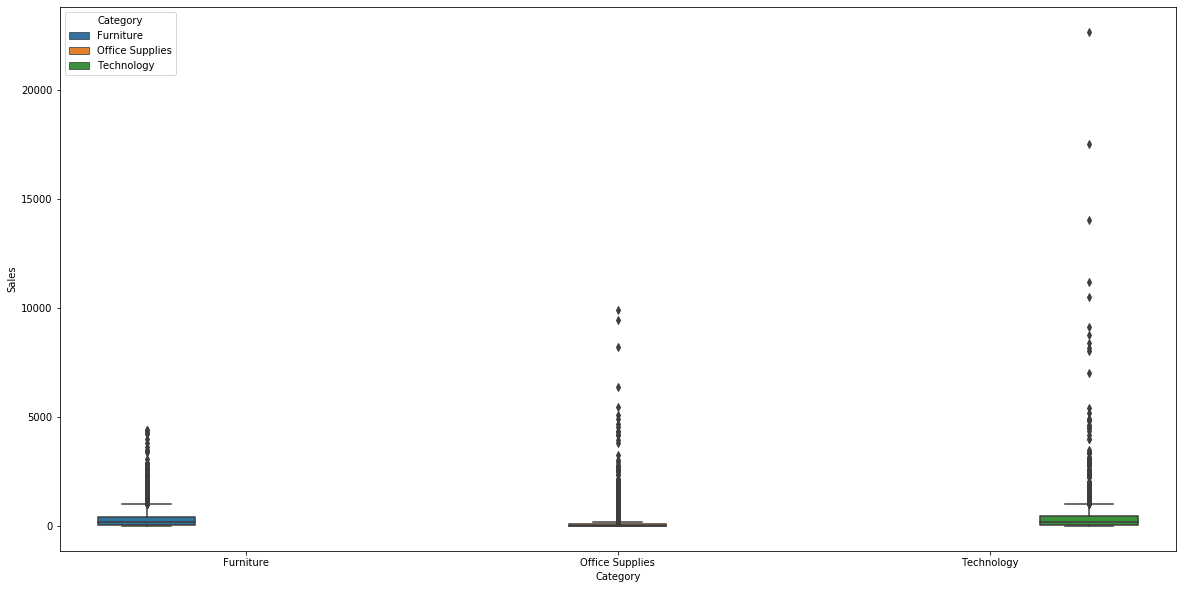

In [108]:
#let's check category versus profit
plt.rcParams['figure.figsize']=(20,10)
sns.boxplot(y='Sales', x='Category', data=df, hue="Category")

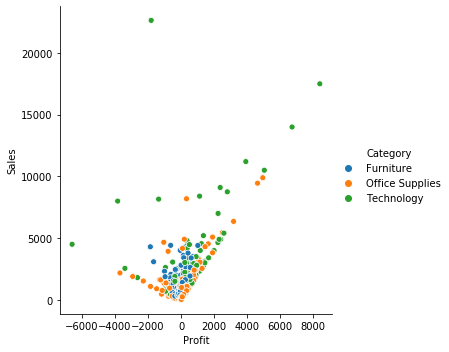

In [109]:
#let's check Sales versus profit in each category
#plt.rcParams['figure.figsize']=(30,10)
# plt.figure(figsize=(45,10))
#sns.boxplot(y='Profit', x='Category', data=df, hue="Category")
sns.relplot(x="Profit", y="Sales", hue="Category", data=df, sizes=(50,20));


In [110]:
# creating a new column based on existing profit column
df['Profit/Loss'] = 'Great Profit'
df.loc[(df['Profit'] > 0) & (df['Profit'] <= 200), 'Profit/Loss'] = 'Good Profit'
df.loc[(df['Profit'] <= 0) ,'Profit/Loss'] = 'Loss'
df

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country/Region,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit/Loss
0,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Good Profit
1,2018-11-08,2018-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Great Profit
2,2018-06-12,2018-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Good Profit
3,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Loss
4,2017-10-11,2017-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Good Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2016-01-21,2016-01-23,Second Class,Tom Boeckenhauer,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,Good Profit
9990,2019-02-26,2019-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,Good Profit
9991,2019-02-26,2019-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,Good Profit
9992,2019-02-26,2019-03-03,Standard Class,Dave Brooks,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,Good Profit


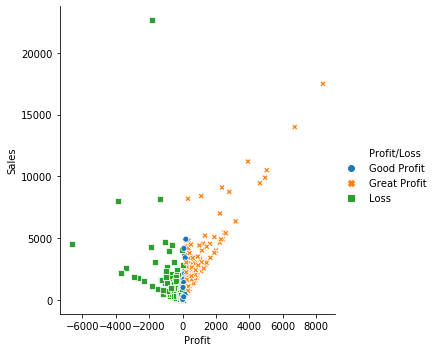

In [111]:
# let's check distribution of profit and loss 
sns.relplot(x="Profit", y="Sales", hue="Profit/Loss",style = 'Profit/Loss', data=df, sizes = (45,15));


In [112]:
# summary statistics 
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [113]:
# Let's create 2 groups of sales, less than equal to 500 & greater than 500 and going to perform hypothesis testing
# salesgrp1 = df.loc[df['Sales'] >= 500]
# salesgrp2= df.loc[df['Sales'] < 500]
#Another method:
s = 500
df1 = df[df['Sales'] >= s]
# df1
df2 = df[df['Sales'] < s]
# df2

##### (a)Hypothesis testing:
###### (i)  null and alternate hypothesis for Quantity
State the hypothesis:
H0 = The average quantity is same in both "<$500USD"  and ">=$500USD" samples

Ha = The average quantity is different in the "<$500USD"  and ">=$500USD" samples
Significance level(Alpha) : 5%
Solution: Following are the results of the T-test:

In [114]:
# importing statistics libraries
import scipy

In [115]:
scipy.stats.ttest_ind(df1['Quantity'], df2['Quantity']) # reject the null hypothesis

Ttest_indResult(statistic=23.048541232059527, pvalue=1.4303352494373927e-114)

As the p-value is less than the 0.05 significance level, we
reject the null hypothesis that the average quantity is same in both groups.

###### (i)  null and alternate hypothesis for Profit 
State the hypothesis:
H0 = The average profit is same in both "<$500"  and ">=$500" samples

Ha = The average profit is different in the "<$500"  and ">=$500" samples
Significance level(Alpha) : 5%
Solution: Following are the results of the T-test:

In [116]:
scipy.stats.ttest_ind(df1['Profit'], df2['Profit']) # reject the null hypothesis

Ttest_indResult(statistic=20.92431433691895, pvalue=3.4731221051168224e-95)

As the p-value is less than the 0.05 significance level, we
reject the null hypothesis that the average profit is same in both the groups.

##### Interpretation of t-test
As the p-value is less than the significance level of 0.05, we can
reject the null hypothesis and conclude that Quantity, Profit and Sales
have different means in the “<$500”   and “>=$500”. samples.

##### (b) Correlation Matrix of Numeric Variables:

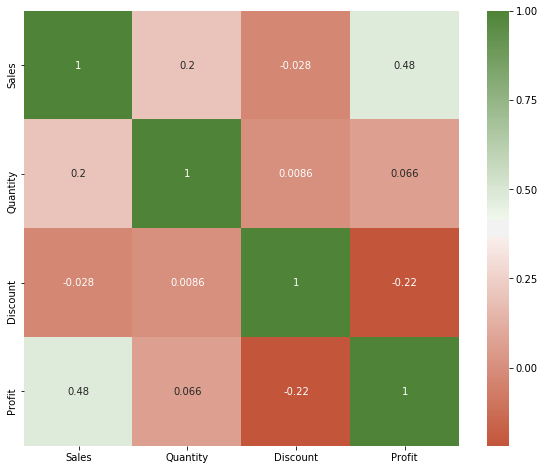

In [117]:
# creating a new dataframe which contains all numeric variables
num_df = df.select_dtypes(include=['number']).copy()
# Visual representation of correlation outputs using seaborn :
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = num_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(20,120, as_cmap=True),\
            square=True, ax=ax, annot =True)

# Another method:
# sns.heatmap(num_df.corr(), annot = True,cmap="Spectral")

###### Interpretation of Correlation Matrix:
Only Profit is positively correlated and there's weak realtionship

The r square is 0.22950265118961094
The correlation between both factors is 0.48


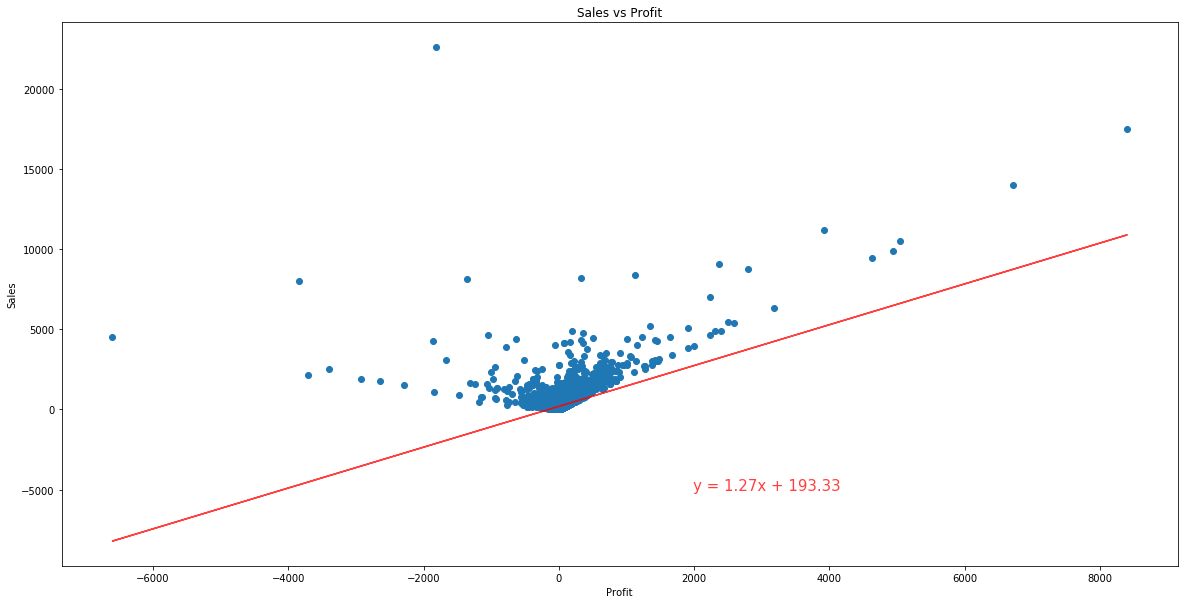

In [118]:
# Sales Vs. Profit, performing linear regression , finding correlation & R-Squared 
# and presenting scatter plot with best fit line
x = num_df['Profit']
y = num_df['Sales']
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r square is {rvalue**2}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-", alpha=0.75)
correlation = sts.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(1980,-5000),fontsize=15, color="red", alpha=0.75)
plt.title("Sales vs Profit")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.show()

The r square is 0.04031854021109583
The correlation between both factors is 0.2


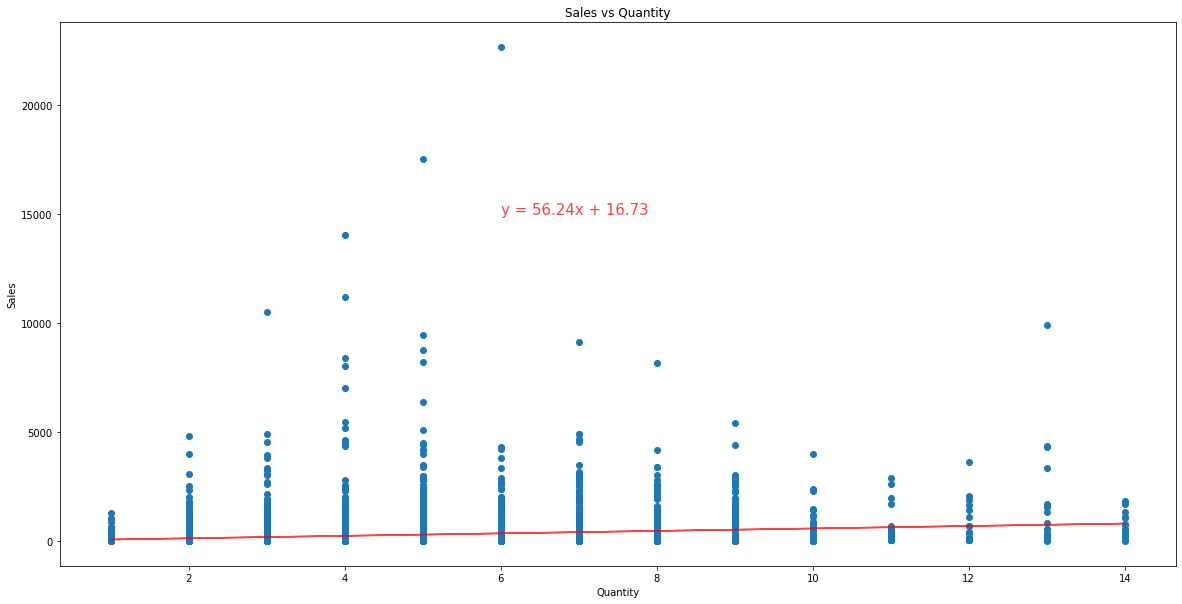

In [119]:
# Sales Vs Quantity, performing linear regression, finding correlation & R-Squared 
# and presenting scatter plot with best fit line
x = num_df['Quantity']
y = num_df['Sales']
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r square is {rvalue**2}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-", alpha=0.75)
correlation = sts.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.annotate(line_eq,(6,15000),fontsize=15, color="red", alpha=0.75)
plt.title("Sales vs Quantity")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.show()

#### (ii) Distribution of Categorical Variable:

In [120]:
round(df['Segment'].value_counts()/len(df)*100,2)

Consumer       51.94
Corporate      30.22
Home Office    17.84
Name: Segment, dtype: float64

###### Consumer is the most popular segment followed by Corporate.

In [121]:
round(df['Category'].value_counts()/len(df)*100,2)

Office Supplies    60.30
Furniture          21.22
Technology         18.48
Name: Category, dtype: float64

###### 60% of the category in the ordered items are office supplies followed by futrniture.

In [122]:
round(df['Sub-Category'].value_counts()/len(df)*100,2)

Binders        15.24
Paper          13.71
Furnishings     9.58
Phones          8.90
Storage         8.47
Art             7.96
Accessories     7.75
Chairs          6.17
Appliances      4.66
Labels          3.64
Tables          3.19
Envelopes       2.54
Bookcases       2.28
Fasteners       2.17
Supplies        1.90
Machines        1.15
Copiers         0.68
Name: Sub-Category, dtype: float64

###### Sub-Category has office supplies on top !

In [123]:
round(df['Ship Mode'].value_counts()/len(df)*100,2)

Standard Class    59.72
Second Class      19.46
First Class       15.39
Same Day           5.43
Name: Ship Mode, dtype: float64

###### Standard Class is undoubtedly the most preferrred shipping method followed by second class, same day is the least used method

In [124]:
from scipy.stats import chi2_contingency

In [125]:
#The research question is the following, 
#is there a relationship between the segment and ship mode?
crosstab = pd.crosstab(df['Segment'],df['Ship Mode'])
chi2_contingency(crosstab)[1]
# p-value = 0.00009005463273040477


9.005463273040477e-05

##### There is a relationship between segment and Ship mode as p < 0.05.

In [126]:
#is there a relationship between the segment and region
crosstabSR = pd.crosstab(df['Segment'],df['Region'])
chi2_contingency(crosstabSR)[1] # 0.5445746876991091

0.5445746876991091

##### There is not any relationship between segment and region as p > 0.05.

In [127]:
#Tis there a relationship between the segment and region?
crosstabSC = pd.crosstab(df['Ship Mode'],df['Category'])
chi2_contingency(crosstabSC)[1] # 0.0.7334430848247819
#There is not any relationship between segment and region as p > 0.05.

0.7334430848247819

In [128]:
#is there a relationship between the category and region?
crosstabCR = pd.crosstab(df['Category'],df['Region'])
chi2_contingency(crosstabCR)[1] # 0.7223155543986877
#There is not any relationship between categoey and region as p > 0.05.

0.7223155543986877

In [129]:
#is there a relationship between the category and region?
crosstabCS = pd.crosstab(df['Category'],df['Sub-Category'])
chi2_contingency(crosstabCS)[1] # 0.0
#There is not any relationship between categoey and region as p = 0.05.

0.0

In [130]:
#is there a relationship between the segment and category?
crosstabSC = pd.crosstab(df['Segment'],df['Category'])
chi2_contingency(crosstabSC)[1] #0.8334835825190556
#There is not any relationship between segment and category as p > 0.05.

0.8334835825190556

In [131]:
#The research question is the following, is there a relationship between the segment and sub-category?
crosstabSsubc = pd.crosstab(df['Segment'],df['Sub-Category'])
chi2_contingency(crosstabSsubc)[1] #0.7908446323024501
#There is not any relationship between segment and sub-category as p > 0.05.

0.7908446323024501

###### Interpretation: Only relationship that can be seen is between segment and ship mode, no other categorical variables show any relationship

### Step 3: Predictive Modeling 
#### Part-1 with all relevant Columns: let's declare our target variable

In [151]:
# let's drop non-informative columns including postal code they aren't providing any insight
finaldf = df.drop(["Order Date","Ship Date","Product Name",'Country/Region','Customer Name','Profit/Loss'], axis=1)
finaldf.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [133]:
# First, designating target variable name
targetName = 'Sales'
targetSeries = finaldf[targetName]
#remove target from current location and insert in column 0
del finaldf[targetName]
finaldf.insert(0, targetName, targetSeries)
# collecting all features
features = ['Ship Mode','Segment','City','State','Region','Category','Sub-Category','Quantity','Discount','Profit']
#targetSeries is the new target 
finaldf[:3]

,Sales,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Quantity,Discount,Profit
0,261.96,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,2,0.0,41.9136
1,731.94,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,3,0.0,219.5820
2,14.62,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,2,0.0,6.8714


In [134]:
print(f"Target column is: {target} ")
print(f"Features columns are: {features}")

Target column is: Sales 
Features columns are: ['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 'Profit']


#### Importing all dependencies 

In [135]:
# All required packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
import time 
from operator import itemgetter
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#### Performing data transformation:
##### categorical variables will have multiple columns based on number of class

In [136]:

for col in finaldf.columns:
	attName = col
	dType = finaldf[col].dtype
	missing = pd.isnull(finaldf[col]).any()
	uniqueCount = len(finaldf[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		finaldf = pd.concat([finaldf, pd.get_dummies(finaldf[col], prefix=col)], axis=1)
		del finaldf[attName]

In [137]:
# Let's check first 3 rows after trasformation 
finaldf[:3]
# now, we have total 615 columns

,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,261.96,2,0.0,41.9136,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,731.94,3,0.0,219.5820,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.62,2,0.0,6.8714,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


#### separating target and features dataset

In [138]:
from sklearn.model_selection import train_test_split
# splitting dataset into testing and training
X_train, X_test, y_train, y_test = train_test_split(
    finaldf.iloc[:,1:].values, finaldf.iloc[:,0].values, test_size=0.30, random_state=4)

#### Checking the datasets' dimension

In [139]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(6995, 614)
(6995,)
(2999, 614)
(2999,)


##### Superstore data set has been partitioned into 70-30%

#### Training the models and predicting on the test data set using Linear Regression

In [140]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# instantiating
lin_reg = LinearRegression()
# fitting
lin_reg.fit(X_train, y_train)
# predicting
y_pred = lin_reg.predict(X_test)

#### Evaluating the performance of the Models for linear regression Model

In [141]:
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# let's check r^2
print('Linear regression R-squared": %.4f' % lin_reg.score(X_test, y_test))

Mean Absolute Error: 209.32579591083226
Mean Squared Error: 205095.29685595148
Root Mean Squared Error: 452.8744824517622
Linear regression R-squared": 0.4566


#### Training the models and predicting on the test data set using Random Forest Models

In [142]:
# Let's try Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
RfModel = RandomForestRegressor(random_state=1, max_depth=10)
# fitting the model
RfModel.fit(X_train,y_train)
# make predictions
y_pred = RfModel.predict(X_test)

#### Evaluating the performance of the Models for Random Forest Model

In [143]:
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# let's check r^2
print('Random Forest R squared": %.4f' % RfModel.score(X_test, y_test))

Mean Absolute Error: 82.61728444686507
Mean Squared Error: 80884.24068050821
Root Mean Squared Error: 284.40154830891515
Random Forest R squared": 0.7857


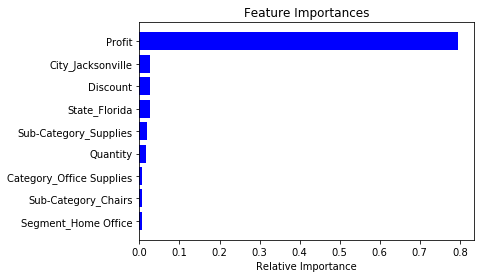

In [144]:
# Finding the most important features
# storing all feature names
feature_names = finaldf.columns[1:]
# feature_names
importances = RfModel.feature_importances_
indices = np.argsort(importances) [-9:]  # top 10 features
# indices[:10]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Using 5-fold cross-validation:
When only a limited amount of data is available, to achieve an unbias estimate of the model performance we use k-fold cross-validation. In the k-fold cross-validation, we divide the data into k subsets of equal size. We build models times, each time leaving out one of the subsets from training and use it as the test set.

In [145]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RfModel, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.7224544103938622


#### Training the models and predicting on the test data set using Gradient Boosting

In [146]:
# training GB with default settings
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
GDR_model = ensemble.GradientBoostingRegressor()
# fitting the model
GDR_model.fit(X_train, y_train)
# predicting
y_pred_GDR = GDR_model.predict(X_test)

#### Evaluating the performance of the Models for Gradient Boosting Model

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import metrics

# model_mse = mean_squared_error(y_pred_GDR, y_test)
# model_rmse = np.sqrt(model_mse)
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_GDR))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_GDR))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GDR)))

# let's check r^2
print('Gradient Boosting R squared": %.4f' % GDR_model.score(X_test, y_test))

Mean Absolute Error: 90.02309699723467
Mean Squared Error: 88856.49043497344
Root Mean Squared Error: 298.0880581891422
Gradient Boosting R squared": 0.7646


In [148]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GDR_model, X_train, y_train, cv=5)
print("Average coefficient of determination using 5-fold cross-validation:",np.mean(scores))

Average coefficient of determination using 5-fold cross-validation: 0.705822997299747


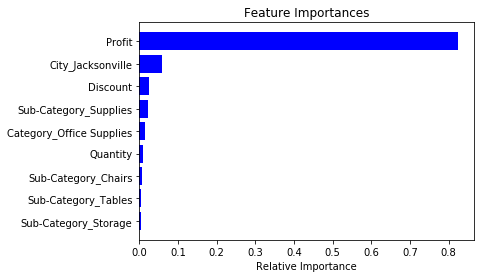

In [149]:
# Finding the most important features
# storing all feature names
feature_names = finaldf.columns[1:]
#feature_names
importances = GDR_model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Dimension deduction

In [152]:
# now let's drop city ,state and profit/loss
Reduceddf = finaldf.drop(['City','State'], axis=1)
Reduceddf.head()

,Ship Mode,Segment,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Part-2 Performing data transformation for reduced data frame:
##### categorical variables will have multiple columns based on number of class

In [153]:
for col in Reduceddf.columns:
	attName = col
	dType = Reduceddf[col].dtype
	missing = pd.isnull(Reduceddf[col]).any()
	uniqueCount = len(Reduceddf[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		Reduceddf = pd.concat([Reduceddf, pd.get_dummies(Reduceddf[col], prefix=col)], axis=1)
		del Reduceddf[attName]

In [154]:
from sklearn.model_selection import train_test_split
# splitting dataset into testing and training
XR_train, XR_test, yr_train, yr_test = train_test_split(
    Reduceddf.iloc[:,1:].values, Reduceddf.iloc[:,0].values, test_size=0.30, random_state=4)

In [155]:
# checking dimension of the dataframe(rows & columns) 
Reduceddf.shape
# checking all columns and their data types
# Reduceddf.dtypes

(9994, 35)

#### Checking the datasets' dimension

In [156]:
# training data set
print(XR_train.shape)
# training target data set
print(y_train.shape)
# testing data set
print(XR_test.shape)
# testing target data set
print(yr_test.shape)

(6995, 34)
(6995,)
(2999, 34)
(2999,)


#### Training, testing and evaluating the Linear Regression model for Reduced data set

In [157]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# instantiating
lin_reg = LinearRegression()
# fitting
lin_reg.fit(XR_train, y_train)
# predicting
yr_pred = lin_reg.predict(XR_test)
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(yr_test, yr_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(yr_test, yr_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

# let's check r^2
print('Linear regression R-squared": %.4f' % lin_reg.score(XR_test, yr_test))

Mean Absolute Error: 187.29641052466516
Mean Squared Error: 189815.4424715982
Root Mean Squared Error: 435.67814091551367
Linear regression R-squared": 0.4971


#### Training, testing and evaluating the Random Forest model for Reduced data set

In [158]:
# Let's try Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
RfModel = RandomForestRegressor(random_state=1, max_depth=10)
# fitting the model
RfModel.fit(XR_train,yr_train)
# make predictions
yr_pred = RfModel.predict(XR_test)
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(yr_test, yr_pred))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(yr_test, yr_pred))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yr_test, yr_pred)))

# let's check r^2
print('Random Forest R squared": %.4f' % RfModel.score(XR_test, yr_test))

Mean Absolute Error: 83.83355065658674
Mean Squared Error: 107152.55436718682
Root Mean Squared Error: 327.34164777367823
Random Forest R squared": 0.7161


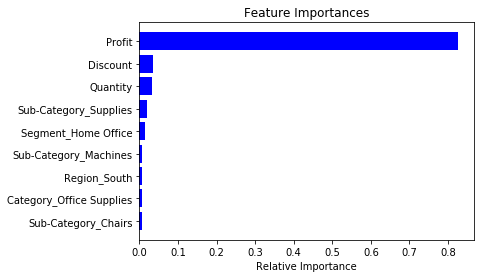

In [159]:
# Finding the most important features
# storing all feature names
feature_names = Reduceddf.columns[1:]
# feature_names
importances = RfModel.feature_importances_
indices = np.argsort(importances) [-9:]  # top 10 features
# indices[:10]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Training, testing and evaluating the Gradient Boosting model for Reduced data set

In [160]:
# training Gradient Boosting with default settings
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
GDR_model = ensemble.GradientBoostingRegressor()
GDR_model.fit(XR_train, yr_train)

GradientBoostingRegressor()

In [161]:
yr_pred_GDR = GDR_model.predict(XR_test)
# Mean absolute error(ME)
print('Mean Absolute Error:', metrics.mean_absolute_error(yr_test, yr_pred_GDR))  
# MSE
print('Mean Squared Error:', metrics.mean_squared_error(yr_test, yr_pred_GDR))  
#RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yr_test, yr_pred_GDR)))

# let's check r^2
print('Gradient Boosting R squared": %.4f' % GDR_model.score(XR_test, yr_test))

Mean Absolute Error: 89.59555764183953
Mean Squared Error: 122456.89113441098
Root Mean Squared Error: 349.938410487347
Gradient Boosting R squared": 0.6756


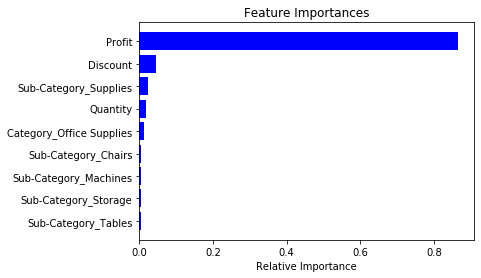

In [162]:
# Finding the most important features
# storing all feature names
feature_names = Reduceddf.columns[1:]
#feature_names
importances = GDR_model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Summary & Conclusion:
I have analyzed superstore data to explore relationship between variables, find patterns and discover insights to optimize our sales process besides keeping our forecasted profit.

After understanding the data, I have excluded few variables from the analysis because they were non-informative such as all ID columns while few variables (customer name, product name and dates) were dropped to keep the simplicity and focus on important predictors or features that helps in predicting Sales based on my instinct after exploratory data analysis which included statistical testing.

Three predictive models have been presented for the final dataframe: Most basic linear regression, Random Forest and Gradient Boosting. 

After running these three training models and evaluating the testing model for both final and reduced dataframes, R^2 looked promising for Random Forest model based on the logic of "Select either a high R2 or a low MSE". (https://stats.stackexchange.com/questions/100281/selecting-the-best-model-using-cross-validation-on-coefficient-of-determination )

We can see that 49% of the variability in Y can be explained using X if we use linear regression model whereas 78% of the variability in Y can be explained using X if we use Random Forest model.
But since random forest is known for overfitting, I tried gradient boosting (another ensemble model) and here, 66% of the variability in Y can be explained using X. But, Mean Squared Error(MSE) value  is lowest in Random Forest model as compared all other models and we know that the smaller MSE is, the closer the model prediction is to the actual data. So basically, either a high R2 or a low MSE. (https://stats.stackexchange.com/questions/32596/what-is-the-difference-between-coefficient-of-determination-and-mean-squared)

Therefore, I'll select Random Forest Model as my best model and thus important features are Profit, city, discount, state, sub category, quantity,category, and segment!

Further discussion could involve how we plan our important variables to keep our supplies in the segments, category, sub-categories and concentrate city & state based factors to increase our orders, sales, profit by providing optimal ratio of quantity & discount.  

###                               **** ***************************************************       The End With New Begining In sight!!! ****************************************